In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import src
from testingUtils import testing_main as tm
import matplotlib.pyplot as plt
import numpy as np


import src
from src.nc4.BJDSprialScan import processExpSprialScans, spiralPlotter
# import matplotlib as mp
# mpl.use('TkAgg')
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
HOME_DIR, BASE_DIR, CODE_DIR, TB_DIR, RMS_DATA_DIR = src.config.config_paths()

# Testing Main Notebook

`testing_main.py` contains multiple functions:
- `main()`: choose an exp to load in, update and save it.
- `update(exp)`: update exp with new data, and display nc4.
- `check_ae(exp)`: plot last file of AE data in test.
- `check_nc4(exp)`: calc last NC4 file attributes and plot results.

----------------------TESTING EXP FILE----------------------
Test No: 34
Date: 2025-01-28
Data: ..\..\AE\Testing\25_01_28_weartest_D1.3_#1000
No. Files: AE-77 NC4-78
------------------------------------------------------------
------------------------------------------------------------
NC4 - File 77:
	Mean radius = 0.610748 mm
	Runout = 0.029 um
	Wear = -7.895 %
------------------------------------------------------------


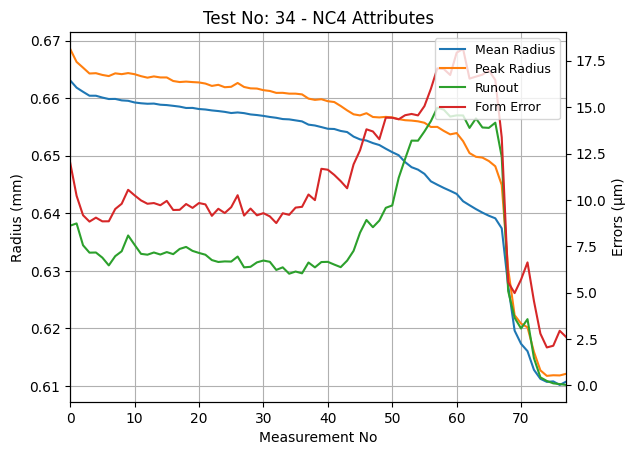

In [3]:
exp = tm.main()

In [54]:
exp.save()

------------------------------------------------------------
Updating experiemnt obj - 2025-01-29 10:12:50.932302
No. Files: AE-80 NC4-81
------------------------------------------------------------
NC4 - File 80:
	Mean radius = 0.650072 mm
	Runout = 1.128 um
	Wear = -1.964 %
------------------------------------------------------------


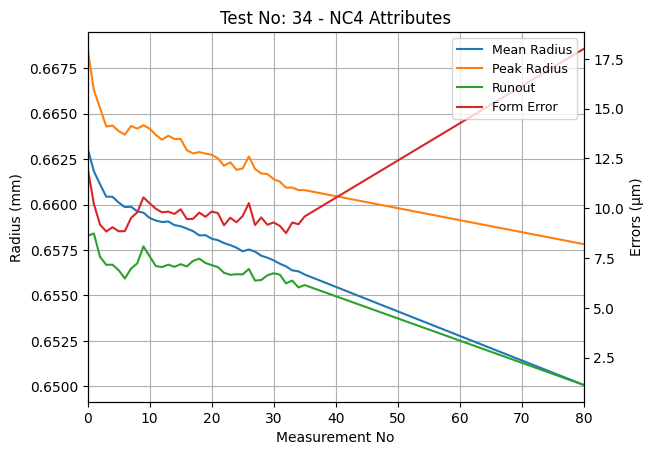

In [39]:
f = tm.update(exp)

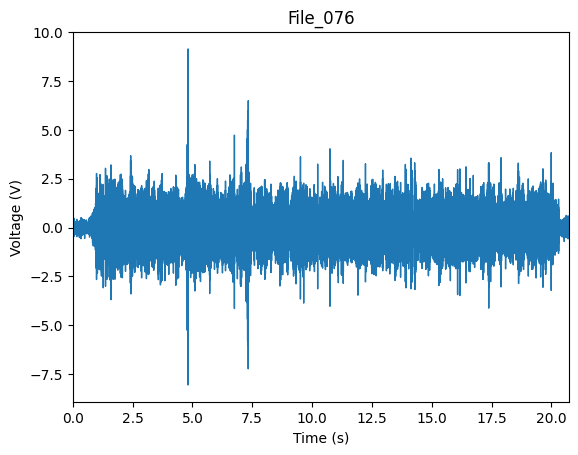

In [55]:
tm.check_ae(exp)

In [56]:
exp.nc4.process()

NC4- Calc att: 100%|██████████| 78/78 [00:08<00:00,  9.47it/s]


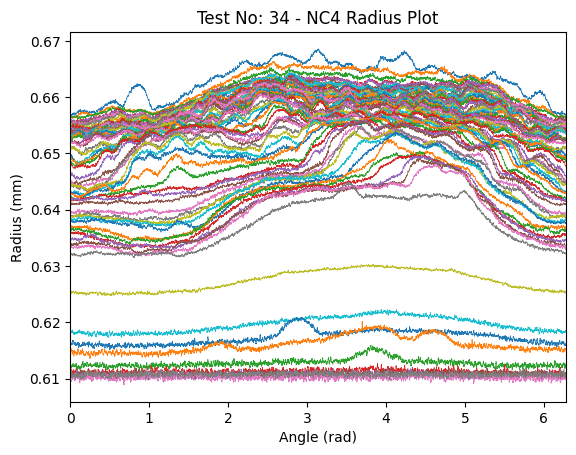

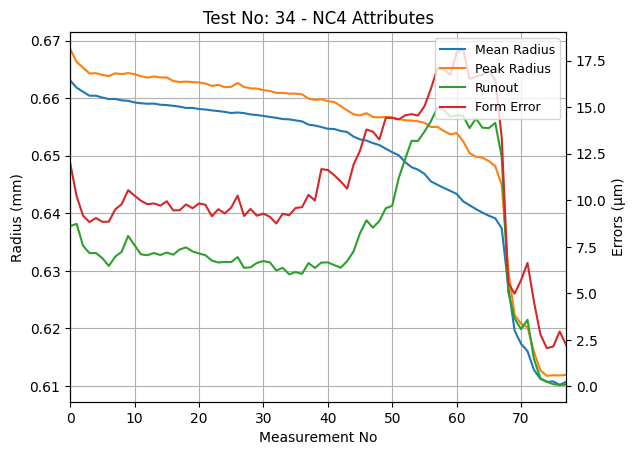

In [57]:
fno = (0, None) 
f = exp.nc4.plot_xy(fno)
f = exp.nc4.plot_att(fno)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Test No: 34 - NC4 Radius Surface'}, xlabel='Angle (rad)', ylabel='Measurement Number'>)

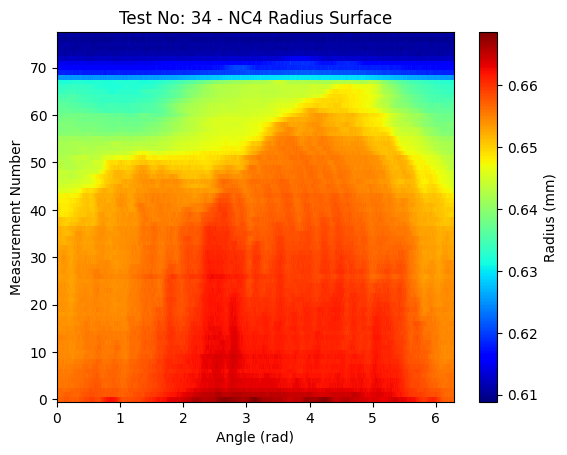

In [58]:
exp.nc4.plot_surf(fno)

In [59]:
exp.save()

In [45]:
# NC4 Spiral Scans
NOM_DIA = 1.3
FEEDRATE = 2
RPM = 60
FS = 50_000
YOFFSET = 0.03
CALFEEDRATE = 60

SCPath = CODE_DIR.joinpath(
    r'src/reference/NC4_BJD_SCurve_2024_05_30_14_17_12-Ch0-50kHz.tdms'
)
assert SCPath.exists(), "SCurve calibration file not found."

expSpiralScans = processExpSprialScans(exp,
                                       SCPath,
                                       NOM_DIA,
                                       FEEDRATE,
                                       RPM,
                                       FS,
                                       YOFFSET,
                                       CALFEEDRATE,
                                       )

for sc in expSpiralScans:
    fig, ax = sc.plotSpiralScan(saveFig=True)
    plt.close(fig)

Processing Spiral Scans: 100%|██████████| 17/17 [00:28<00:00,  1.70s/it]


In [ ]:
# %matplotlib widget
scPlotter = spiralPlotter(expSpiralScans, exp.test_info.testno).plot()

In [20]:
def _smooth(sig, win=11):
    """
    Smooth signal using a moving average filter.

    Replicates MATLAB's smooth function. (http://tinyurl.com/374kd3ny)

    Args:
        sig (np.array): Signal to smooth.
        win (int, optional): Window size. Defaults to 11.

    Returns:
        np.array: Smoothed signal.
    """
    out = np.convolve(sig, np.ones(win, dtype=int), 'valid') / win
    r = np.arange(1, win - 1, 2)
    start = np.cumsum(sig[:win - 1])[::2] / r
    stop = (np.cumsum(sig[:-win:-1])[::2] / r)[::-1]
    return np.concatenate((start, out, stop))

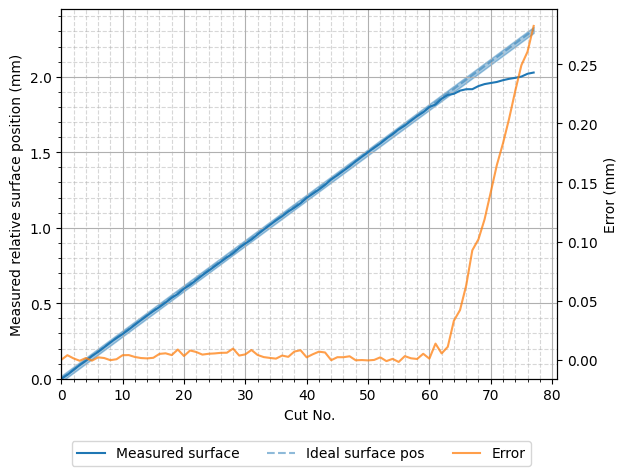

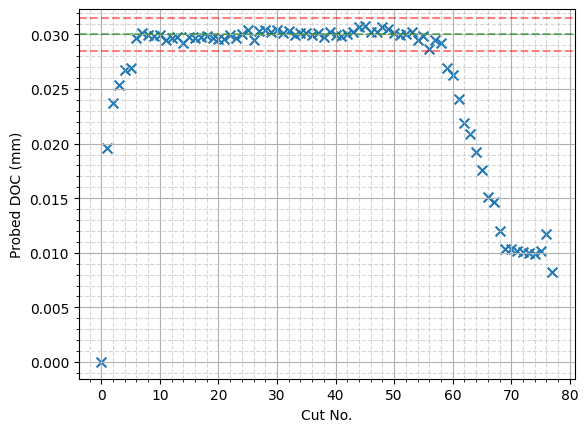

In [60]:
exp.probe
exp.probe.refreshProbeData()
if exp.probe is not None:
    fig, ax = exp.probe.plot_probe_DOC()
    ax.minorticks_on()
    ax.grid(True, which='major')
    ax.grid(True, which='minor', linestyle='--', alpha=0.5)
    # ax.set_xlim(0, len(exp.probe.probeData) - 16)

    y = exp.probe.probeData['PROBEDIFF'].values
    y = _smooth(y, win=11)

    fig, ax = plt.subplots()
    ax.scatter(x=exp.probe.probeData.index,
               y=y,
               marker='x',
               s=50,
               )
    ax.axhline(exp.probe.doc, color='g', linestyle='--', alpha=0.5)
    ax.axhline(exp.probe.doc - 0.0015, color='r', linestyle='--', alpha=0.5)
    ax.axhline(exp.probe.doc + 0.0015, color='r', linestyle='--', alpha=0.5)
    ax.set_xlabel('Cut No.')
    ax.set_ylabel('Probed DOC (mm)')
    ax.grid(True, which='major')
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle='--', alpha=0.5)
    # ax.set_xlim(0, len(exp.probe.probeData) - 16)

### Extra Processing - Wait till CUSP

In [4]:
exp.ae.process()

Calc FFT 1 kHz: 100%|██████████| 77/77 [00:40<00:00,  1.92it/s]


In [5]:
exp.save()

In [6]:
exp.create_feat_df();

Feature DF of Test 34:
        RMS  Kurtosis  Amplitude  Skewness  Freq 10 kHz  Freq 35 kHz  \
0       NaN       NaN        NaN       NaN          NaN          NaN   
1  0.692064  8.187664  10.438477 -0.037318    24.173131    62.913892   
2  0.801455  5.259516   6.494391  0.014985    23.174766    67.314460   
3  0.841386  4.783223   6.268691  0.013296    23.101043    68.466262   
4  0.845723  4.580351   6.986832  0.024134    23.051158    68.854978   

   Freq 134 kHz  Mean radius  Peak radius  Radius diff    Runout  Form error  \
0           NaN     0.663096     0.668565          NaN  0.008611    0.012011   
1     43.887218     0.661834     0.666307    -0.001263  0.008734    0.010222   
2     44.215186     0.661116     0.665312    -0.000718  0.007557    0.009174   
3     44.409868     0.660433     0.664292    -0.000682  0.007158    0.008831   
4     44.692759     0.660431     0.664347    -0.000002  0.007166    0.009045   

   Avg probe  Probe diff  
0     0.0000      0.0000  
1     0.0

In [12]:
exp.save()

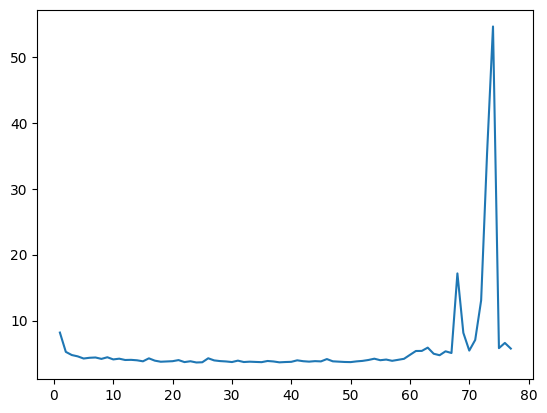

In [8]:
plt.figure()
plt.plot(exp.features['Kurtosis'])

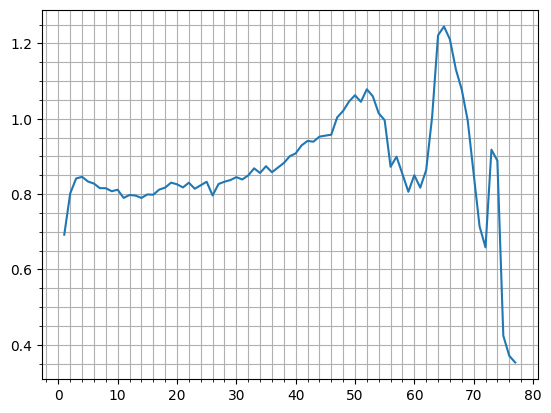

In [9]:
plt.figure()
plt.plot(exp.features['RMS'])
plt.minorticks_on()
plt.grid(True, which='both')

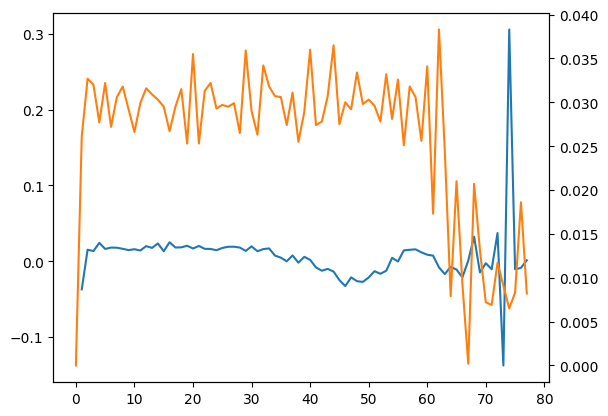

In [10]:
plt.figure()
plt.plot(exp.features['Skewness'])
# plt.ylim(2, 10)
plt.twinx()
plt.plot(exp.features['Probe diff'], 'C1')
# plt.plot(exp.features['Runout'], 'C1')

In [11]:
print(exp.features)

         RMS   Kurtosis  Amplitude  Skewness  Freq 10 kHz  Freq 35 kHz  \
0        NaN        NaN        NaN       NaN          NaN          NaN   
1   0.692064   8.187664  10.438477 -0.037318    24.173131    62.913892   
2   0.801455   5.259516   6.494391  0.014985    23.174766    67.314460   
3   0.841386   4.783223   6.268691  0.013296    23.101043    68.466262   
4   0.845723   4.580351   6.986832  0.024134    23.051158    68.854978   
..       ...        ...        ...       ...          ...          ...   
73  0.917777  35.365758  17.128710 -0.137687    29.692559    64.075950   
74  0.888582  54.595113  19.459519  0.305663    29.762273    61.569651   
75  0.423839   5.823723   6.884842 -0.010730    29.002038    56.755562   
76  0.370527   6.615299  11.536337 -0.008914    27.974639    54.334238   
77  0.352787   5.761756   3.679549  0.001082    28.161992    54.461341   

    Freq 134 kHz  Mean radius  Peak radius  Radius diff    Runout  Form error  \
0            NaN     0.663096 

In [ ]:
nc4_df = exp.features.loc[:, ['Mean radius', 'Peak radius', 'Runout', 'Form error']]
nc4_df.head()
nc4_df.to_csv(fr'{exp.dataloc}\NC4Data.csv')